Accuracy: 0.97847533632287
Precision: 0.9144736842105263
Recall: 0.9266666666666666

Confusion Matrix:
 [[952  13]
 [ 11 139]]


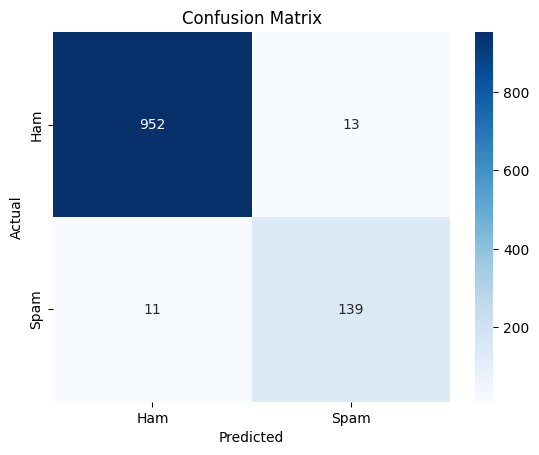

In [ ]:
# Task 2: Spam Detection using MultinomialNB

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only necessary columns
df.columns = ['label', 'message']

# Step 3: Preprocessing
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Vectorization
vectorizer = CountVectorizer()  # TfidfVectorizer can also be use
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the MultinomialNB Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("\nConfusion Matrix:\n", cm)

# Step 9: Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
